In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [14]:
data = pd.read_excel ("DATA RUMAH.xlsx")
data

,NO,NAMA RUMAH,HARGA,LB,LT,KT,KM,GRS
0,1,"Rumah Murah Hook Tebet Timur, Tebet, Jakarta S...",3800000000,220,220,3,3,0
1,2,"Rumah Modern di Tebet dekat Stasiun, Tebet, Ja...",4600000000,180,137,4,3,2
2,3,"Rumah Mewah 2 Lantai Hanya 3 Menit Ke Tebet, T...",3000000000,267,250,4,4,4
3,4,"Rumah Baru Tebet, Tebet, Jakarta Selatan",430000000,40,25,2,2,0
4,5,"Rumah Bagus Tebet komp Gudang Peluru lt 350m, ...",9000000000,400,355,6,5,3
...,...,...,...,...,...,...,...,...
1005,1006,Rumah Strategis Akses Jalan 2mobil Di Menteng ...,9000000000,450,550,10,10,3
1006,1007,Tebet Rumah Siap Huni Jln 2 Mbl Nyaman,4000000000,160,140,4,3,2
1007,1008,"Di Kebun Baru Rumah Terawat, Area Strategis",4000000000,139,230,4,4,1
1008,1009,Dijual Cepat Rumah Komp Depkeu Dr Soepomo Tebe...,19000000000,360,606,7,4,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   NO          1010 non-null   int64 
 1   NAMA RUMAH  1010 non-null   object
 2   HARGA       1010 non-null   int64 
 3   LB          1010 non-null   int64 
 4   LT          1010 non-null   int64 
 5   KT          1010 non-null   int64 
 6   KM          1010 non-null   int64 
 7   GRS         1010 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 63.3+ KB


In [4]:
data = data[:][:300]
data_new = data.drop(["NO", "NAMA RUMAH", "HARGA", "LT", "KT", "KM", "GRS"], axis=1)
data_new.head()

,LB
0,220
1,180
2,267
3,40
4,400


In [6]:
data_new = data_new.dropna()

In [7]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   LB      300 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaling = scaler.fit_transform(data_new)
data_preprocess = pd.DataFrame(data=scaling, columns = data_new.columns)
data_preprocess.head(10)

,LB
0,-0.310553
1,-0.542626
2,-0.037867
3,-1.354883
4,0.733777
5,0.153594
6,-0.890736
7,0.443686
8,-0.861727
9,-0.136498


C:\Users\febri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\febri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\febri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\febri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

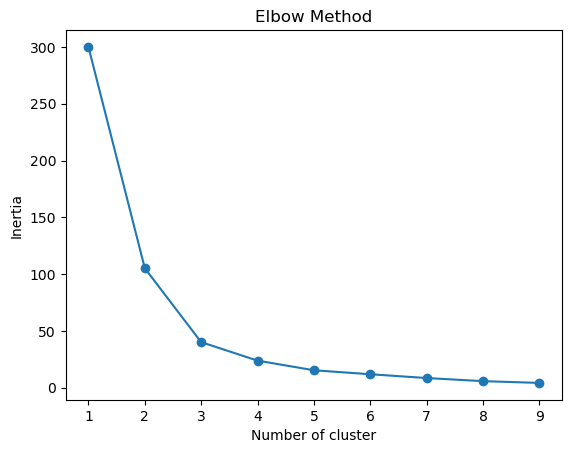

In [9]:
inertia = []
for k in range(1,10):
    kmeans = KMeans(n_clusters = k, random_state=42).fit(data_preprocess)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10), inertia, marker="o")
plt.xlabel("Number of cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [10]:
kmeans = KMeans(n_clusters = 4, random_state=42)
kmeans.fit(data_preprocess)

C:\Users\febri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [11]:
data_preprocess.head()

,LB
0,-0.310553
1,-0.542626
2,-0.037867
3,-1.354883
4,0.733777


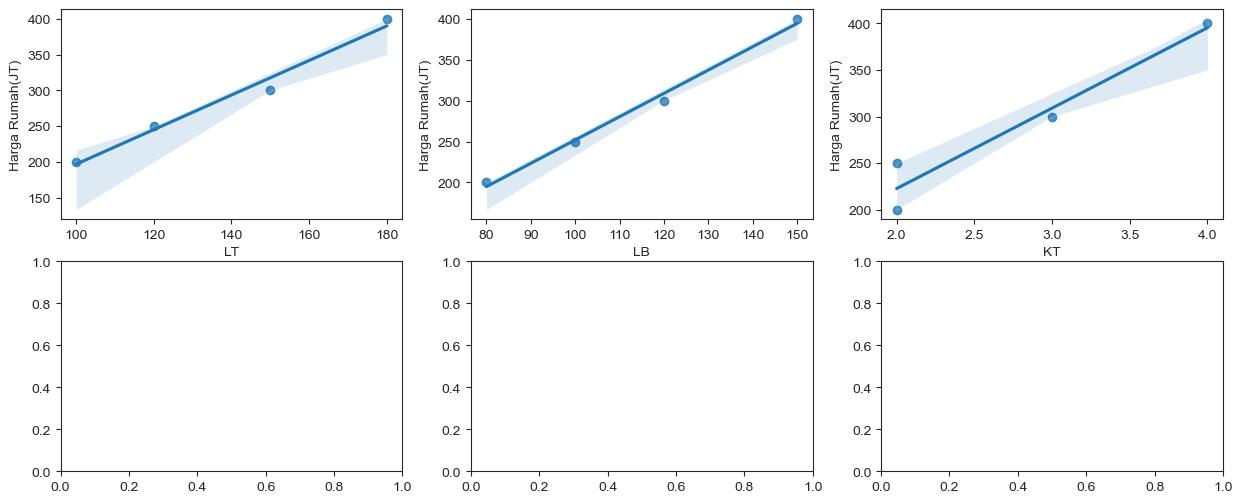

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({
    "LT": [100, 150, 120, 180],
S    "LB": [80, 120, 100, 150],
    "KT": [2, 3, 2, 4],
    "Harga Rumah(JT)": [200, 300, 250, 400]
})

fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(15, 6), dpi=100)
sns.set_style("ticks")
sns.regplot(data=df, x="LT", y="Harga Rumah(JT)", ax=axs[0][0])
sns.regplot(data=df, x="LB", y="Harga Rumah(JT)", ax=axs[0][1])
sns.regplot(data=df, x="KT", y="Harga Rumah(JT)", ax=axs[0][2])

plt.show()


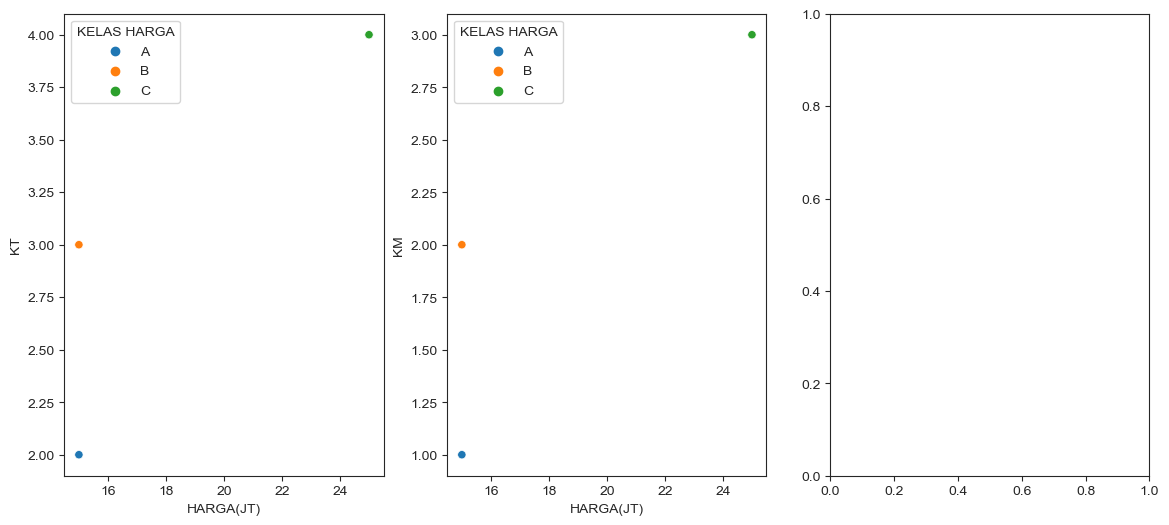

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_rumah = pd.DataFrame({
    "HARGA(JT)": [10, 15, 20, 25],
    "KT": [2, 3, 2, 4],
    "KM": [1, 2, 1, 3],
    "KELAS HARGA": ["A", "B", "A", "C"]
})

data_dengan_pengelompokan_harga = data_rumah.groupby("KELAS HARGA").mean().reset_index()

fig, axs = plt.subplots(ncols=3, nrows=1, figsize=(14, 6), dpi=100)
sns.scatterplot(data=data_dengan_pengelompokan_harga, x="HARGA(JT)", y="KT", hue="KELAS HARGA", ax=axs[0])
sns.scatterplot(data=data_dengan_pengelompokan_harga, x="HARGA(JT)", y="KM", hue="KELAS HARGA", ax=axs[1])

plt.show()

